In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud

!pip install textblob
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
!pip install lexicalrichness

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Niki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Niki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
%run TrainToDTM.ipynb

In [3]:
train = pd.read_csv('train.csv')
dtm = pd.read_csv('dtm.csv')

In [4]:
#Get string with list of words used in effective, ineffective, and adequate discourse
effective_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Effective').dropna().to_string(header = False, index = False))
adequate_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Adequate').dropna().to_string(header = False, index = False))
ineffective_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Ineffective').dropna().to_string(header = False, index = False))

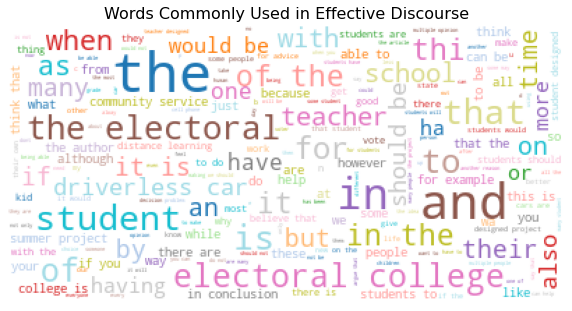

In [5]:
wc_effective = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling=0.6, 
               colormap = 'tab20',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(effective_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_effective)
plt.title("Words Commonly Used in Effective Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

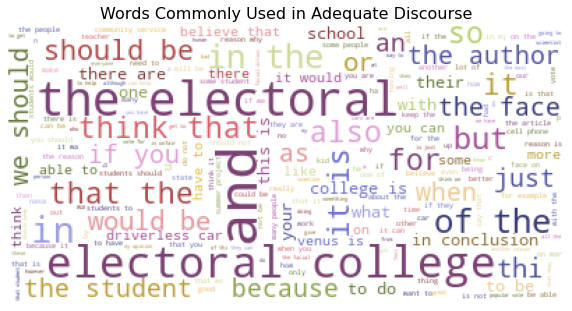

In [6]:
wc_adequate = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling= 0.6, 
               colormap = 'tab20b',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(adequate_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_adequate)
plt.title("Words Commonly Used in Adequate Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

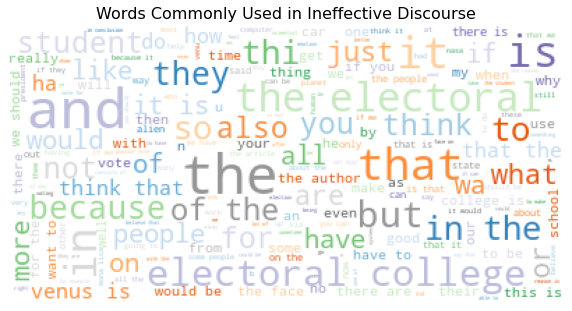

In [7]:
wc_ineffective = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling= 0.6, 
               colormap = 'tab20c',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(ineffective_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_ineffective)
plt.title("Words Commonly Used in Ineffective Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

In [8]:
from lexicalrichness import LexicalRichness

#Function to obtain type token ratio of each discourse sample
def ttr(text):
    lex = LexicalRichness(text)
    return lex.ttr

#Function to obtain measure of textual lexical density of each discourse sample
def f_mtld(text):
    lex = LexicalRichness(text)
    return lex.mtld(threshold = 0.72)

#Function to obtain lexical diversity (Summer's measure) of each discourse sample
def dugast(text):
    lex = LexicalRichness(text)
    try:
        return lex.Dugast
    except:
        return 0

#Create dataframe with discourse type, discourse effectiveness, ttr, and herdan lexical diversity
lex_measures = pd.DataFrame(columns = ['text', 'discourse_type', 'discourse_effectiveness', 'ttr', 'lex_diversity', 'dugast'])
lex_measures.text = train.discourse_text
lex_measures.discourse_type = train.discourse_type
lex_measures.discourse_effectiveness = train.discourse_effectiveness
lex_measures.ttr = lex_measures.text.transform(ttr)
lex_measures.lex_diversity = lex_measures.text.transform(f_mtld)
lex_measures.dugast = lex_measures.text.apply(dugast)

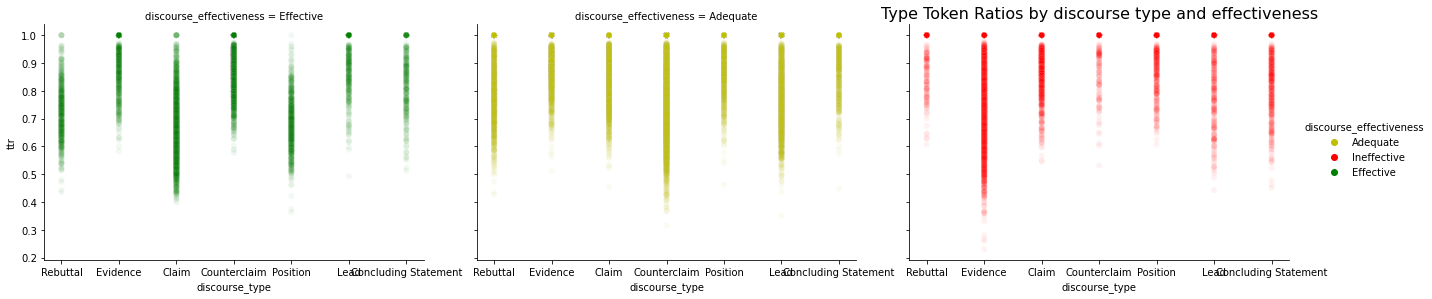

In [9]:
sns.relplot(data = lex_measures,
           x = 'discourse_type',
           y = 'ttr',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.05,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Type Token Ratios by discourse type and effectiveness", {'fontsize': 16})
plt.show()

Noteworthy results: Effective discourse contains relatively low lexical diversity for claims, positions and rebuttals, as measured by the type token ratio.

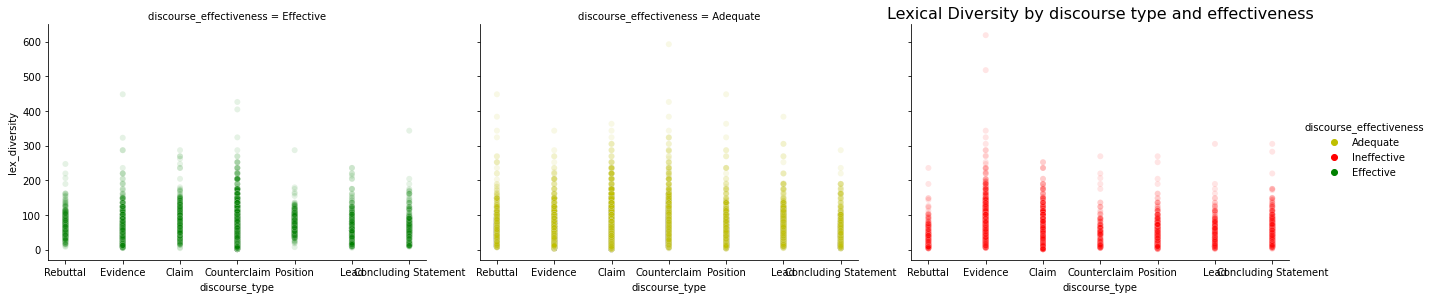

In [10]:
sns.relplot(data = lex_measures,
           x = 'discourse_type',
           y = 'lex_diversity',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Lexical Diversity by discourse type and effectiveness", {'fontsize': 16})
plt.show()

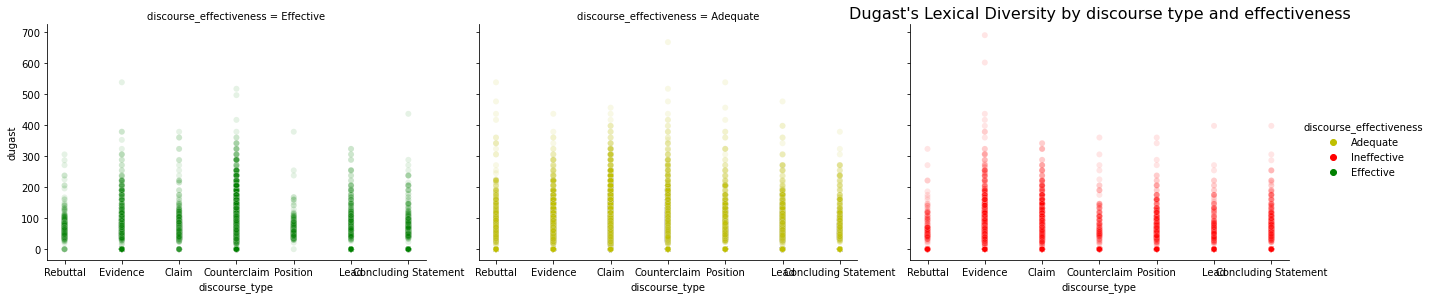

In [11]:
sns.relplot(data = lex_measures,
           x = 'discourse_type',
           y = 'dugast',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Dugast's Lexical Diversity by discourse type and effectiveness", {'fontsize': 16})
plt.show()

In [12]:
def count_pos(text):
    blob_object = TextBlob(str(text))
    df = pd.DataFrame(blob_object.tags)
    pos_dict = {
        'WP':'noun',
        'NN':'noun',
        'NNS':'noun',
        'NNP':'noun',
        'NNPS':'noun',
        'PDT':'noun',
        'PRP':'noun',
        'WDT':'adjective',
        'DT':'adjective',
        'EX':'adjective',
        'JJ':'adjective',
        'JJR':'adjective',
        'JJS':'adjective',
        'LS':'adjective',
        'POS':'adjective',
        'PRP$':'adjective',
        'WP$':'adjective',
        'CD':'adjective',
        'MD':'adverb',
        'RB':'adverb',
        'RBR':'adverb',
        'RBS':'adverb',
        'WRB':'adverb',
        'RP':'verb',
        'VB':'verb',
        'VBD':'verb',
        'VBG':'verb',
        'VBN':'verb',
        'VBP':'verb',
        'VBZ':'verb',
        'TO':'preposition',
        'CC':'conjunction',
        'IN':'conjunction',
        'UH':'interjection'
    }
    
    df.replace(pos_dict, inplace = True)
    result = pd.DataFrame(columns = ['Count'], index = ['noun', 'adjective', 'adverb', 'verb', 'preposition', 'conjunction', 'interjection'])
    try: 
        result.loc[['noun'], ['Count']] = df[1].value_counts()['noun']
    except: 
        result.loc[['noun'], ['Count']] = 0
    try:
        result.loc[['adjective'], ['Count']] = df[1].value_counts()['adjective']
    except:
        result.loc[['adjective'], ['Count']] = 0
    try:
        result.loc[['adverb'], ['Count']] = df[1].value_counts()['adverb']
    except:
        result.loc[['adverb'], ['Count']] = 0
    try:
        result.loc[['verb'], ['Count']] = df[1].value_counts()['verb']
    except:
        result.loc[['verb'], ['Count']] = 0
    try:
        result.loc[['preposition'], ['Count']] = df[1].value_counts()['preposition']
    except:
        result.loc[['preposition'], ['Count']] = 0
    try:
        result.loc[['conjunction'], ['Count']] = df[1].value_counts()['conjunction']
    except:
        result.loc[['conjunction'], ['Count']] = 0
    try:
        result.loc[['interjection'], ['Count']] = df[1].value_counts()['interjection']
    except:
        result.loc[['interjection'], ['Count']] = 0
    return np.array(result.loc[:, 'Count'])

In [13]:
#Parts of speech order: 'noun', 'adjective', 'adverb', 'verb', 'preposition', 'conjunction', 'interjection'
pos_df = pd.DataFrame(columns = ['discourse_type', 'discourse_effectiveness', 'pos'])
pos_df['discourse_type'] = train['discourse_type']
pos_df['discourse_effectiveness'] = train['discourse_effectiveness']
pos_df['pos'] = train['discourse_text'].apply(lambda x: count_pos(x))

In [14]:
#Separate parts of speech into individual columns
pos_df = pd.concat([pos_df, pd.DataFrame(pos_df['pos'].to_list(), columns = ['noun', 'adjective', 'adverb', 'verb', 'preposition', 'conjunction', 'interjection'])], axis = 1)
pos_df.drop('pos', axis = 1, inplace = True)

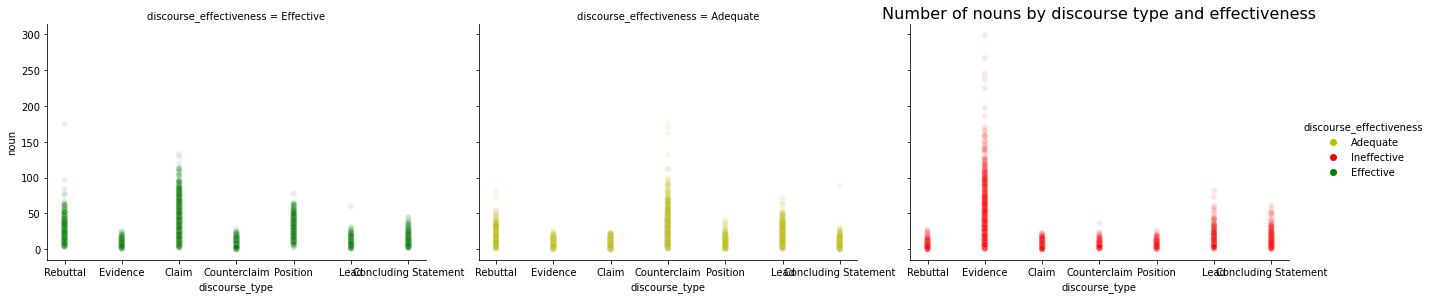

In [15]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'noun',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of nouns by discourse type and effectiveness", {'fontsize': 16})
plt.show()

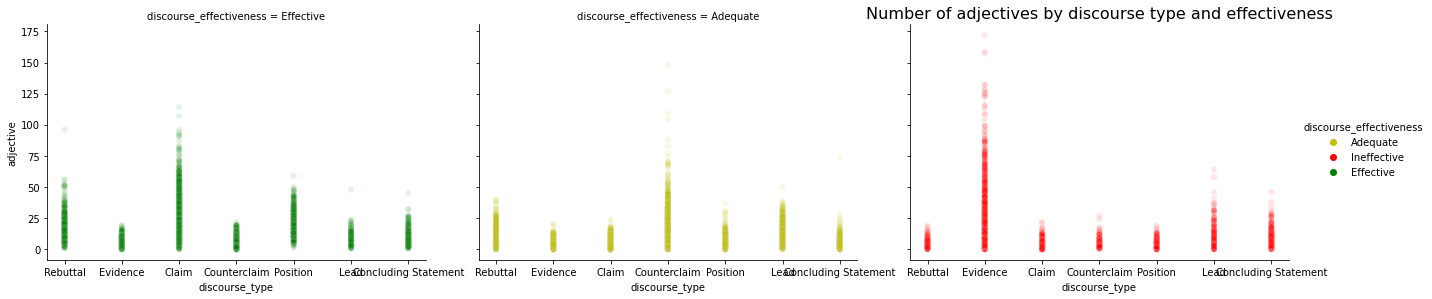

In [16]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'adjective',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of adjectives by discourse type and effectiveness", {'fontsize': 16})
plt.show()

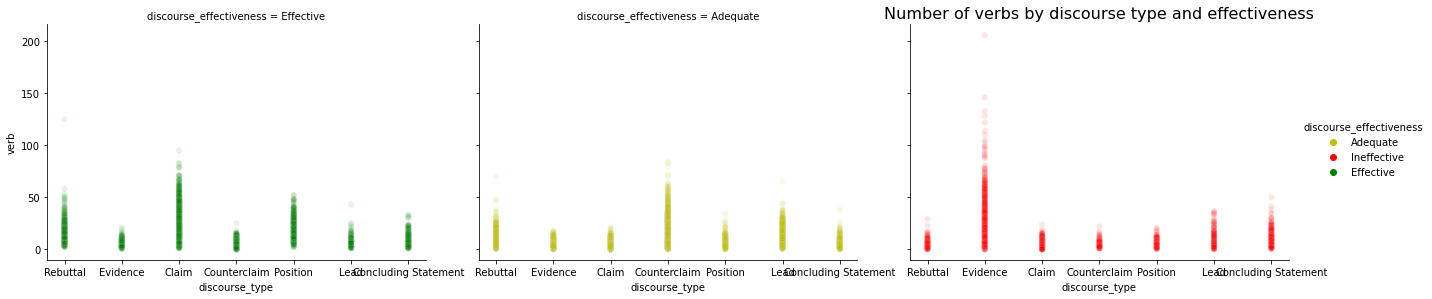

In [17]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'verb',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of verbs by discourse type and effectiveness", {'fontsize': 16})
plt.show()

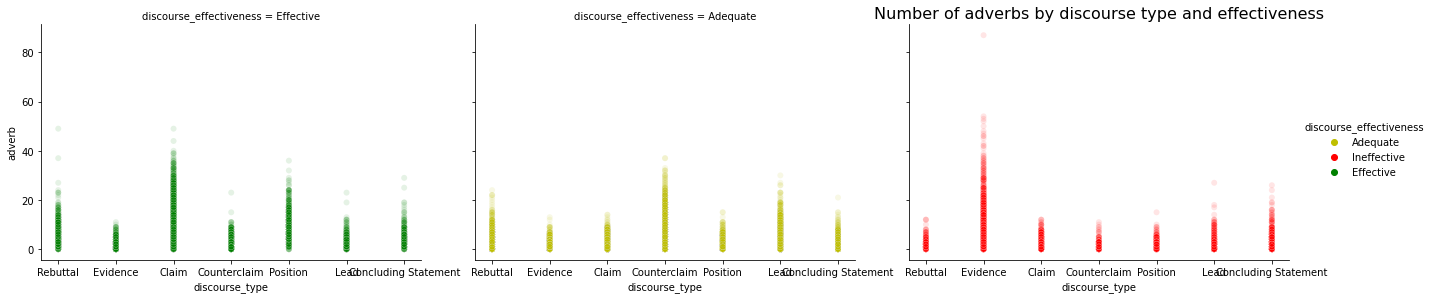

In [19]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'adverb',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of adverbs by discourse type and effectiveness", {'fontsize': 16})
plt.show()

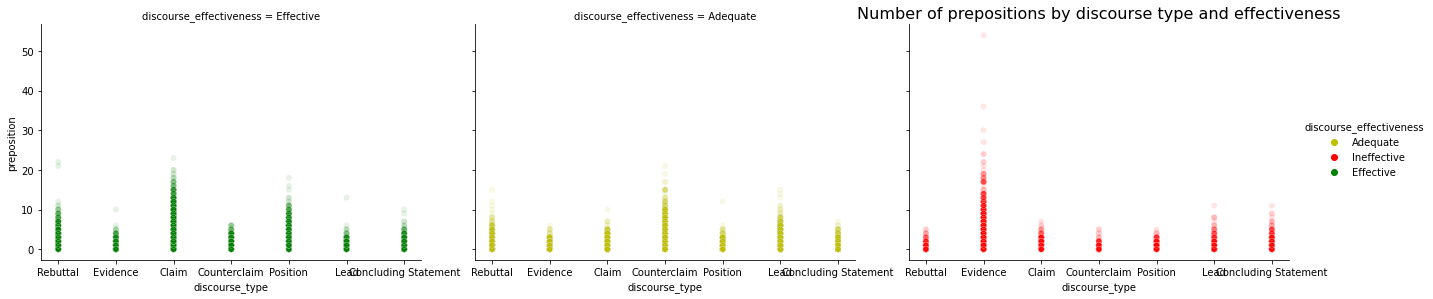

In [20]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'preposition',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of prepositions by discourse type and effectiveness", {'fontsize': 16})
plt.show()

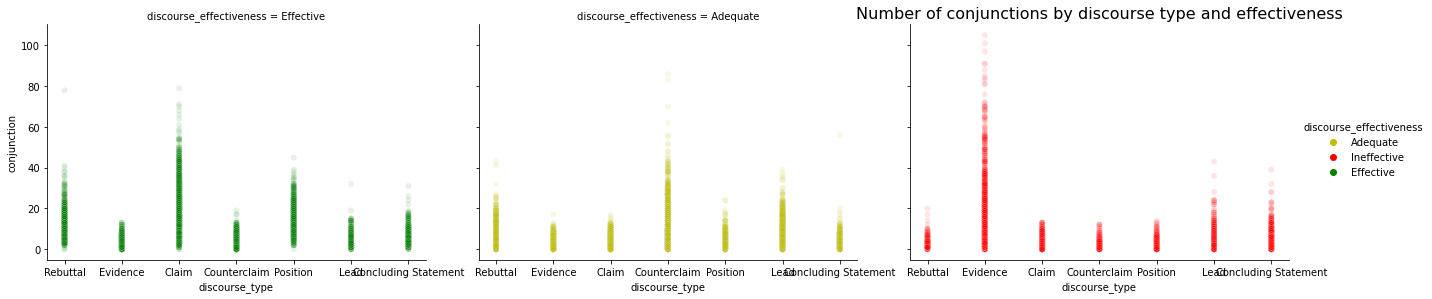

In [21]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'conjunction',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of conjunctions by discourse type and effectiveness", {'fontsize': 16})
plt.show()

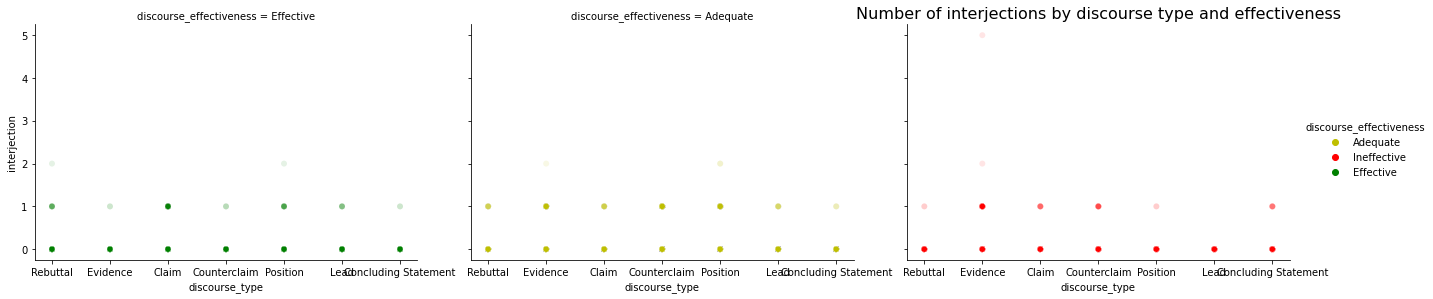

In [22]:
sns.relplot(data = pos_df,
           x = 'discourse_type',
           y = 'interjection',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Number of interjections by discourse type and effectiveness", {'fontsize': 16})
plt.show()

Features that can potentially be used to predict discourse effectiveness:
- Type token ratio
- Dugast's lexical diversity
- count nouns
- count adjectives
- count adverbs
- count verbs
- count prepositions
- count conjunctions